Analyzing rate seasonality and ways to save money in the rental market

Data from Zillow -> Metro U.S. Smoothed Rental Rates

In [ ]:
import pandas as pd

## Data Import and Cleaning

Import the rental data, filter down to a city level, change date to datetime format, set the date as the index, and pivot the data to prepare for use in the SARIMAX model/analysis

In [2]:
df = pd.read_csv(r'data/MetroUSSmoothed.csv')

df

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
0,102001,United States,0,1383.0,1391,1394,1410,1423,1434,1444,...,1750,1760,1768,1765,1763,1764,1764,1756,1753,1751.0
1,394913,"New York, NY",1,2370.0,2390,2395,2426,2456,2476,2489,...,2809,2839,2857,2840,2823,2802,2766,2702,2647,2600.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1884.0,1903,1909,1933,1956,1980,2003,...,2624,2633,2635,2612,2594,2598,2599,2595,2592,2602.0
3,394463,"Chicago, IL",3,1458.0,1468,1472,1491,1507,1519,1528,...,1715,1724,1735,1734,1732,1733,1730,1719,1700,1685.0
4,394514,"Dallas-Fort Worth, TX",4,1212.0,1215,1218,1231,1244,1256,1263,...,1557,1566,1571,1564,1558,1563,1570,1569,1570,1578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,394602,"Fort Collins, CO",159,1199.0,1190,1218,1278,1292,1292,1300,...,1597,1579,1604,1611,1608,1630,1626,1629,1615,1610.0
103,394405,"Boulder, CO",162,1568.0,1465,1519,1552,1594,1609,1637,...,2011,2018,2025,2005,2010,2005,2009,2012,2021,2035.0
104,394645,"Greeley, CO",177,1222.0,1190,1226,1226,1236,1242,1278,...,1614,1647,1655,1637,1641,1639,1640,1647,1672,1669.0
105,394623,"Gainesville, GA",229,912.0,929,931,964,943,944,941,...,1347,1344,1327,1325,1317,1328,1328,1337,1372,1392.0


In [3]:
df_filter = df[(df['SizeRank']>=1) & (df['SizeRank']<=25)]

df_filter

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
1,394913,"New York, NY",1,2370.0,2390,2395,2426,2456,2476,2489,...,2809,2839,2857,2840,2823,2802,2766,2702,2647,2600.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1884.0,1903,1909,1933,1956,1980,2003,...,2624,2633,2635,2612,2594,2598,2599,2595,2592,2602.0
3,394463,"Chicago, IL",3,1458.0,1468,1472,1491,1507,1519,1528,...,1715,1724,1735,1734,1732,1733,1730,1719,1700,1685.0
4,394514,"Dallas-Fort Worth, TX",4,1212.0,1215,1218,1231,1244,1256,1263,...,1557,1566,1571,1564,1558,1563,1570,1569,1570,1578.0
5,394974,"Philadelphia, PA",5,1380.0,1368,1379,1388,1396,1403,1412,...,1618,1627,1639,1634,1630,1631,1635,1632,1639,1635.0
6,394692,"Houston, TX",6,1264.0,1264,1280,1320,1345,1363,1379,...,1506,1511,1516,1512,1503,1504,1502,1503,1506,1505.0
7,395209,"Washington, DC",7,1876.0,1880,1881,1895,1908,1920,1933,...,2121,2128,2141,2132,2124,2120,2116,2103,2086,2068.0
8,394856,"Miami-Fort Lauderdale, FL",8,1572.0,1567,1570,1580,1588,1595,1609,...,1929,1937,1939,1929,1917,1916,1920,1922,1919,1938.0
9,394347,"Atlanta, GA",9,1129.0,1136,1137,1147,1157,1168,1173,...,1543,1556,1566,1559,1559,1565,1576,1589,1602,1617.0
10,394404,"Boston, MA",10,1997.0,2028,2020,2041,2056,2074,2091,...,2462,2481,2498,2498,2478,2470,2453,2395,2342,2313.0


In [4]:
df_cities = df_filter.drop(['RegionID', 'SizeRank'], axis = 1) 

df_cities

,RegionName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
1,"New York, NY",2370.0,2390,2395,2426,2456,2476,2489,2497,2498,...,2809,2839,2857,2840,2823,2802,2766,2702,2647,2600.0
2,"Los Angeles-Long Beach-Anaheim, CA",1884.0,1903,1909,1933,1956,1980,2003,2015,2021,...,2624,2633,2635,2612,2594,2598,2599,2595,2592,2602.0
3,"Chicago, IL",1458.0,1468,1472,1491,1507,1519,1528,1530,1527,...,1715,1724,1735,1734,1732,1733,1730,1719,1700,1685.0
4,"Dallas-Fort Worth, TX",1212.0,1215,1218,1231,1244,1256,1263,1268,1268,...,1557,1566,1571,1564,1558,1563,1570,1569,1570,1578.0
5,"Philadelphia, PA",1380.0,1368,1379,1388,1396,1403,1412,1413,1412,...,1618,1627,1639,1634,1630,1631,1635,1632,1639,1635.0
6,"Houston, TX",1264.0,1264,1280,1320,1345,1363,1379,1383,1381,...,1506,1511,1516,1512,1503,1504,1502,1503,1506,1505.0
7,"Washington, DC",1876.0,1880,1881,1895,1908,1920,1933,1938,1938,...,2121,2128,2141,2132,2124,2120,2116,2103,2086,2068.0
8,"Miami-Fort Lauderdale, FL",1572.0,1567,1570,1580,1588,1595,1609,1619,1630,...,1929,1937,1939,1929,1917,1916,1920,1922,1919,1938.0
9,"Atlanta, GA",1129.0,1136,1137,1147,1157,1168,1173,1175,1175,...,1543,1556,1566,1559,1559,1565,1576,1589,1602,1617.0
10,"Boston, MA",1997.0,2028,2020,2041,2056,2074,2091,2102,2090,...,2462,2481,2498,2498,2478,2470,2453,2395,2342,2313.0


In [5]:
df_hous = df_cities[df_cities['RegionName'] == 'Houston, TX']   

df_hous

,RegionName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
6,"Houston, TX",1264.0,1264,1280,1320,1345,1363,1379,1383,1381,...,1506,1511,1516,1512,1503,1504,1502,1503,1506,1505.0


In [6]:
df_test = df_hous.melt(id_vars=["RegionName"], 
        var_name="Date", 
        value_name="Value")

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  82 non-null     object 
 1   Date        82 non-null     object 
 2   Value       82 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.0+ KB


In [7]:
df_test

,RegionName,Date,Value
0,"Houston, TX",2014-01,1264.0
1,"Houston, TX",2014-02,1264.0
2,"Houston, TX",2014-03,1280.0
3,"Houston, TX",2014-04,1320.0
4,"Houston, TX",2014-05,1345.0
...,...,...,...
77,"Houston, TX",2020-06,1504.0
78,"Houston, TX",2020-07,1502.0
79,"Houston, TX",2020-08,1503.0
80,"Houston, TX",2020-09,1506.0


In [8]:
df_test['Date']= pd.to_datetime(df_test['Date'])

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  82 non-null     object        
 1   Date        82 non-null     datetime64[ns]
 2   Value       82 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.0+ KB


In [9]:
df_test2 = df_test.drop(['RegionName'], axis = 1) 

df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    82 non-null     datetime64[ns]
 1   Value   82 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [10]:
df_test2.set_index('Date', inplace=True)

df_test2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2014-01-01 to 2020-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   82 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [11]:
df_test2

,Value
Date,
2014-01-01,1264.0
2014-02-01,1264.0
2014-03-01,1280.0
2014-04-01,1320.0
2014-05-01,1345.0
...,...
2020-06-01,1504.0
2020-07-01,1502.0
2020-08-01,1503.0


## Data Analysis and Initial Model Results

Split the trend, seasonality, and noise factors out of the original rent trends using time-series seasonal decompososition. 

As we can see by the seasonality results below, there is typically an uptick in rent prices mid-year around June, with the lowest prices being available in January. There is a gradual upwards trend in price, that has remained consistent over the years in the data available. 

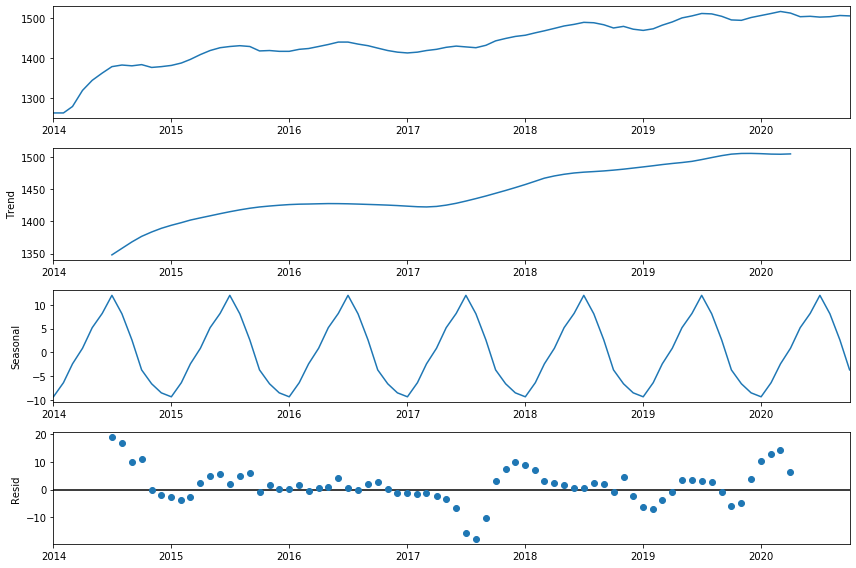

In [12]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

components = seasonal_decompose(df_test2, model='additive')
plt.rcParams["figure.figsize"] = [12,8]
components.plot()
plt.show()


In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Find the best paramaters for the SARIMAX model using the code below

In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_test2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
  
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1410.3566193535582
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1130.0072603117083
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:701.3371894289737
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:536.853488097159
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:680.9405932195691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:649.1604476729755
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:544.5693000964343
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:538.1137183747268
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1288.5415524765535
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1027.2589866812257
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:597.4176510957319
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:463.8310653391304
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:685.1899334103035
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:557.5221817089385
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:478.39603337958914
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:464.2553966426915
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:564.0053321047546
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:427.58313920296627
ARIMA

## Examining Model Results

Check the model results and see which factors had the most influence (for Houston it would be AR / auto regression that has the best fit with a p-value below 10%). Normal skew, with a high kurtosis of 3.75 indicating that there may be more outliers. 

In [15]:
mod = sm.tsa.statespace.SARIMAX(df_test2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                   82
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -162.454
Date:                            Wed, 16 Dec 2020   AIC                            334.908
Time:                                    15:32:40   BIC                            344.945
Sample:                                01-01-2014   HQIC                           338.789
                                     - 10-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4292      0.246      1.744      0.081      -0.053       0.911
ma.L1          0.2418      0.257   

Model looks to have a relatively normal distribution

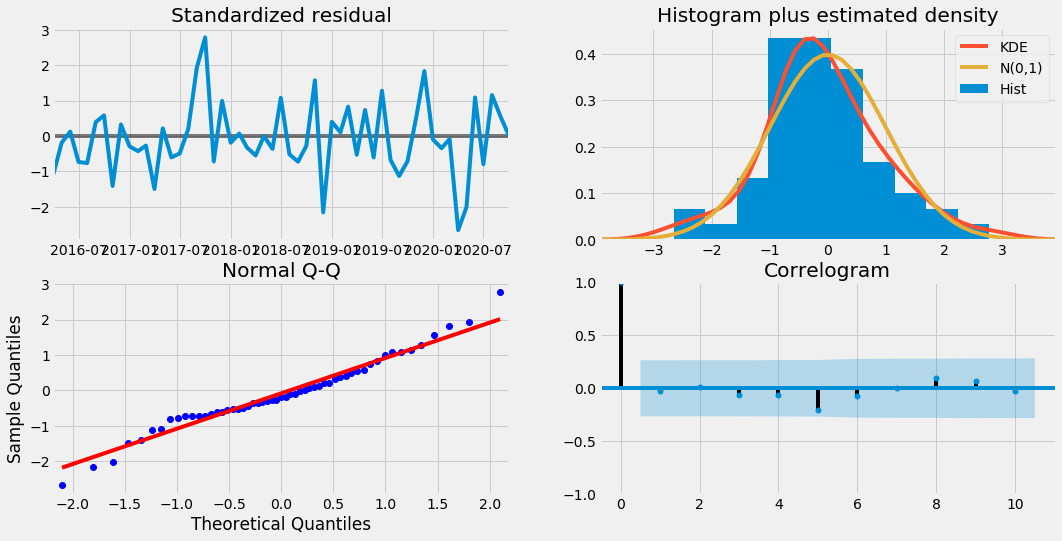

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

The forecast for the model is fairly close to the actual values, looking good so far!

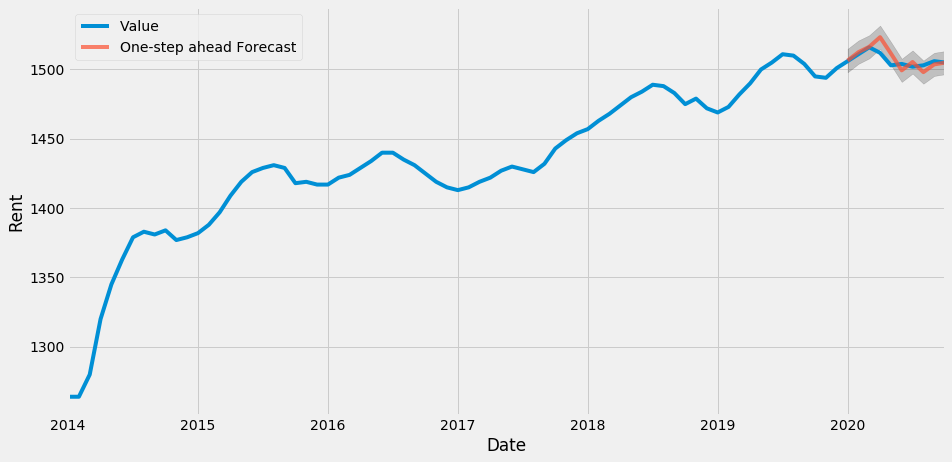

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_test2['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Rent')
plt.legend()
plt.show()

## Final Forecast

Forecasting for the next 24 months to see how rent prices will perform

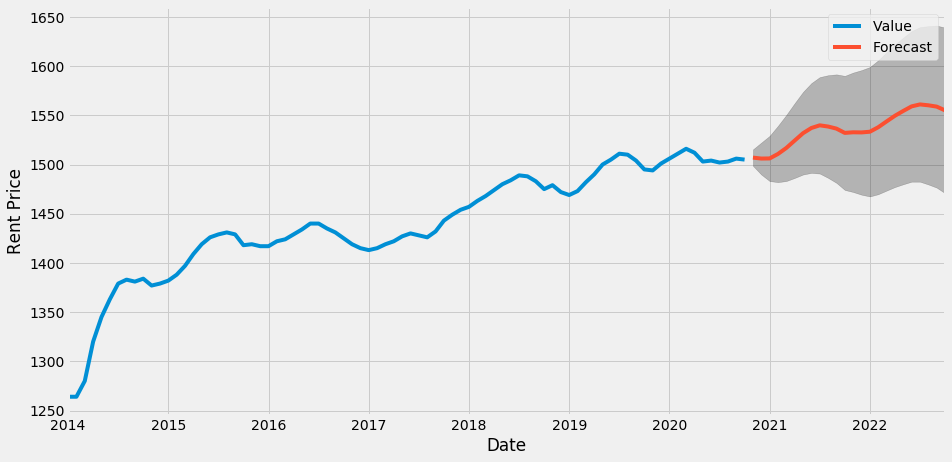

In [18]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = df_test2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Rent Price')
plt.legend()
plt.show()

## Conclusion

The best time to start renting in Houston, Texas is in January when prices are the lowest. As there continues to be an upwards trend in rental prices, longer term rentals in the form of two year leases would most likely prove to be the least expensive. In addition, with the exodus of companies from San Francisco and NYC it is possible that Houston will see more high earning tech workers join the city and drive up prices. 